## Model Predictive Control (MPC) formulation

Objective function:
$$
\underset{u}{\operatorname{arg\,min}} \; 
J(y, u) = 
\sum_{k=0}^{N-1} 
(y_k - y_{\text{ref},k})^\top Q (y_k - y_{\text{ref},k}) + \sum_{k=0}^{M-1} \left[
u_k^\top R u_k + (u_k - u_{\text{prev},k})^\top P (u_k - u_{\text{prev},k}) \right]
$$

where:
$$
y = \begin{bmatrix} y_{k+1} \\ y_{k+2} \\ \vdots \\ y_{k+N} \end{bmatrix}, \quad
u = \begin{bmatrix} u_k \\ u_{k+1} \\ \vdots \\ u_{k+M-1} \end{bmatrix}
$$

Constraints:
$$
y_{\min} \leq y_{k+i} \leq y_{\max} \quad \text{for } i = 1, \ldots, N-1
$$
$$
u_{\min} \leq u_{k+i} \leq u_{\max} \quad \text{for } i = 0, \ldots, M-1
$$
$$
\Delta u_{\min} \leq u_{k+i} - u_{k+i-1} \leq \Delta u_{\max} \quad \text{for } i = 0, \ldots, M-1
$$

### Running an MPC Theoretical Example

Assuming the input streams are separate (changing the flow rate of NTP does not affect the other initial conditions)

Could not find cannot import name 'dopri5' from 'assimulo.lib' (c:\Users\Uchek\anaconda3\envs\assimulo\Lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'rodas' from 'assimulo.lib' (c:\Users\Uchek\anaconda3\envs\assimulo\Lib\site-packages\assimulo\lib\__init__.py)
Could not find cannot import name 'odassl' from 'assimulo.lib' (c:\Users\Uchek\anaconda3\envs\assimulo\Lib\site-packages\assimulo\lib\__init__.py)
Could not find ODEPACK functions.
Could not find RADAR5
Could not find GLIMDA.


Key Enhanced Green Fluorescent Protein not found in the registry.
Returning default values: {'k_app': 5000.0, 'k1': 0.786, 'k2': 60400000.0} for keys: ['Enhanced Green Fluorescent Protein', 'lhs']
Total cost for sequence: 14.708120202856058, Control input: [0.28282828] - (10, 1), Control Output: [1. 0.] - (10, 2)
Total cost for sequence: 14.708120294841448, Control input: [0.2828283] - (10, 1), Control Output: [1. 0.] - (10, 2)
Total cost for sequence: 14.70812028567843, Control input: [0.28282828] - (10, 1), Control Output: [1. 0.] - (10, 2)
Total cost for sequence: 14.708120286004553, Control input: [0.28282828] - (10, 1), Control Output: [1. 0.] - (10, 2)
Total cost for sequence: 14.7081202863162, Control input: [0.28282828] - (10, 1), Control Output: [1. 0.] - (10, 2)
Total cost for sequence: 14.70812028661387, Control input: [0.28282828] - (10, 1), Control Output: [1. 0.] - (10, 2)
Total cost for sequence: 14.708120286898094, Control input: [0.28282828] - (10, 1), Control Output: 

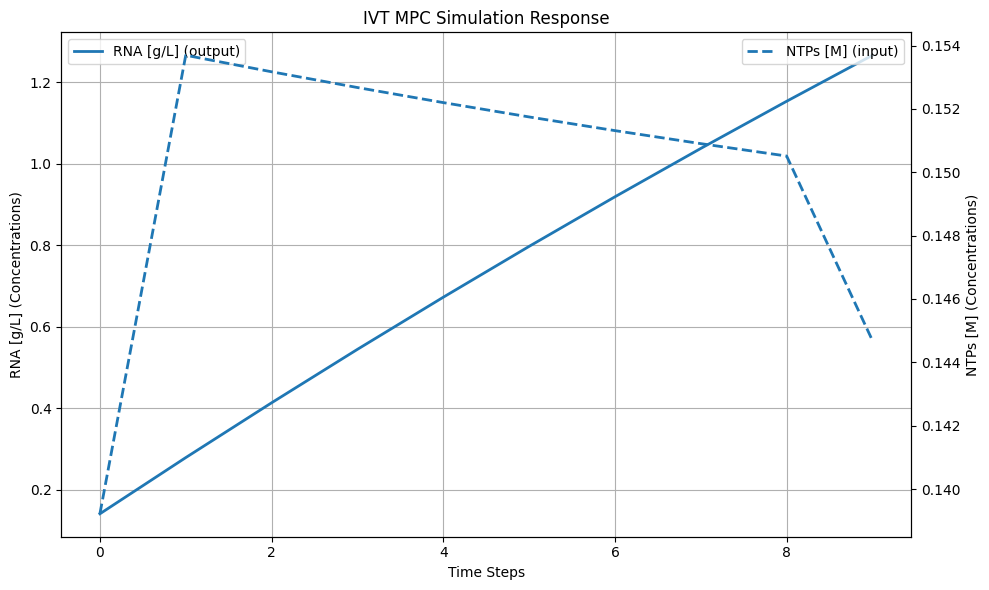

In [1]:
import r3.models.controllers.mpc_controller as mpc
import r3.schema as schema
import numpy as np

controller = mpc.ModelPredictiveControlIVTController(
    control_input_bounds=[(0.01, 1)],
    u_prev=[0.29],
    X_columns=[schema.IVTReactionSchema.NTP_M.value],
    measured_state=[0.0, 0.0],
    y_columns=[
        schema.IVTReactionSchema.RNA_g_L.value,
        schema.IVTReactionSchema.PPi_M.value,
    ],
    y_set_point=[1, 1e-12],
    control_horizon=10,
    w=[1, 1, 1],
    debug=True,
)

control_input, optimal_sequence = controller.run()

print("Optimal control input:", control_input)

controller.display_predicted_response(
    control_strategy=optimal_sequence,
    measured_state=[0.0, 0.0],
    X_columns=[schema.IVTReactionSchema.NTP_M.value],
    y_columns=[
        # schema.IVTReactionSchema.RNA_M.value,
        schema.IVTReactionSchema.RNA_g_L.value,
        # schema.IVTReactionSchema.PPi_M.value,
    ],
)

### Testing a simple strategy, with a sep increase in NTP flow rate

    RNA [g/L]  NTPs [M]
0    0.141548     0.020
1    0.279596     0.020
2    0.414232     0.020
3    0.545542     0.020
4    0.673607     0.020
5    0.798507     0.020
6    0.920322     0.020
7    1.039127     0.020
8    1.154997     0.020
9    1.268003     0.020
10   1.378230     0.039
11   1.485733     0.039
12   1.590579     0.039
13   1.692842     0.039
14   1.792587     0.039
15   1.889876     0.039
16   1.984765     0.039
17   2.077313     0.039
18   2.167577     0.039
19   2.255612     0.039
20   2.341440     0.069
21   2.425257     0.069
22   2.507004     0.069
23   2.586730     0.069
24   2.664485     0.069
25   2.740319     0.069
26   2.814279     0.069
27   2.886410     0.069
28   2.956760     0.069
29   3.025371     0.069


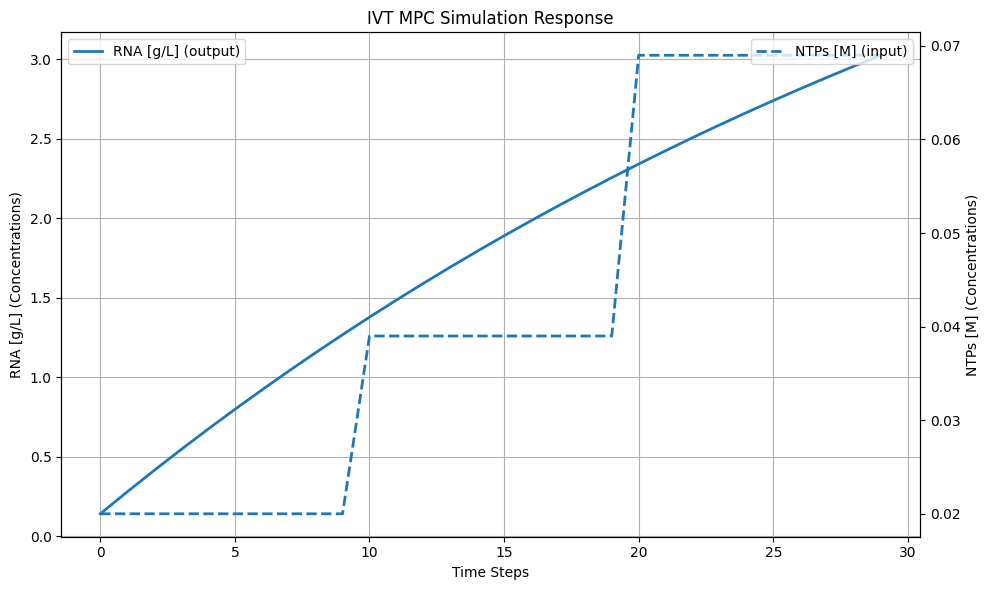

In [2]:
control_strategy = np.array(
    [[0.020] for _ in range(10)]
    + [[0.039] for _ in range(10)]
    + [[0.069] for _ in range(10)]
)
controller.display_predicted_response(
    control_strategy=control_strategy,
    measured_state=[0.0, 0.0],
    X_columns=[schema.IVTReactionSchema.NTP_M.value],
    y_columns=[
        # schema.IVTReactionSchema.RNA_M.value,
        schema.IVTReactionSchema.RNA_g_L.value,
        # schema.IVTReactionSchema.PPi_M.value,
    ],
)

### Investigating how adding a constant amount of NTP affects the response

     RNA [g/L]  NTPs [M]
0     0.141422  0.010000
1     0.279347  0.010029
2     0.413866  0.010058
3     0.545062  0.010087
4     0.673016  0.010116
..         ...       ...
995   5.736166  0.038884
996   5.736166  0.038913
997   5.736166  0.038942
998   5.736166  0.038971
999   5.736166  0.039000

[1000 rows x 2 columns]


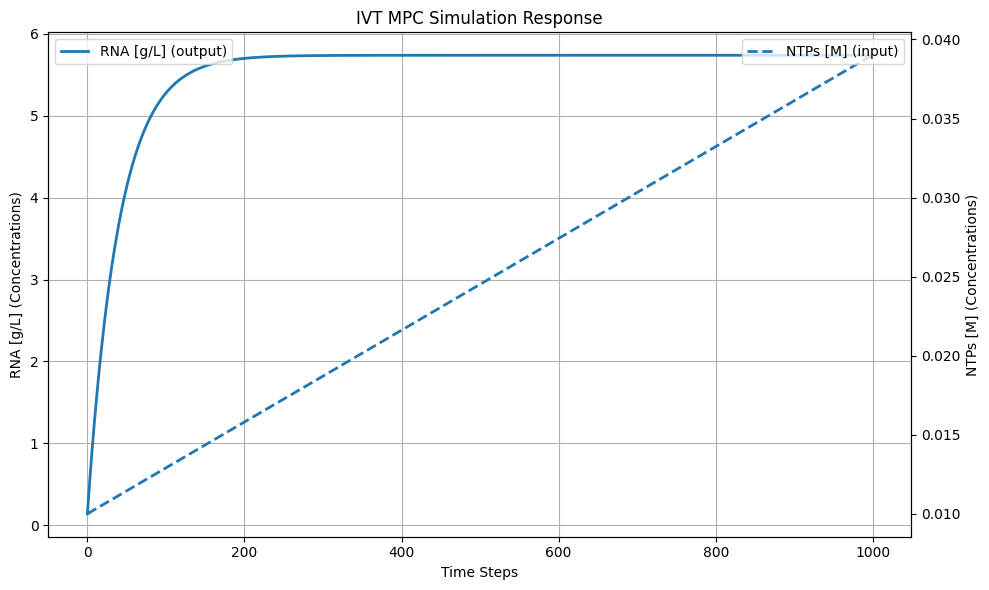

In [3]:
control_strategy = np.array([[u] for u in np.linspace(0.01, 0.039, 1_000)])
controller.display_predicted_response(
    control_strategy=control_strategy,
    measured_state=[0.0, 0.0],
    X_columns=[schema.IVTReactionSchema.NTP_M.value],
    y_columns=[
        # schema.IVTReactionSchema.RNA_M.value,
        schema.IVTReactionSchema.RNA_g_L.value,
        # schema.IVTReactionSchema.PPi_M.value,
    ],
)

## Visualising the MPC Objective Function

Key Enhanced Green Fluorescent Protein not found in the registry.
Returning default values: {'k_app': 5000.0, 'k1': 0.786, 'k2': 60400000.0} for keys: ['Enhanced Green Fluorescent Protein', 'lhs']
Key Enhanced Green Fluorescent Protein not found in the registry.
Returning default values: {'k_app': 5000.0, 'k1': 0.786, 'k2': 60400000.0} for keys: ['Enhanced Green Fluorescent Protein', 'lhs']
Key Enhanced Green Fluorescent Protein not found in the registry.
Returning default values: {'k_app': 5000.0, 'k1': 0.786, 'k2': 60400000.0} for keys: ['Enhanced Green Fluorescent Protein', 'lhs']
Key Enhanced Green Fluorescent Protein not found in the registry.
Returning default values: {'k_app': 5000.0, 'k1': 0.786, 'k2': 60400000.0} for keys: ['Enhanced Green Fluorescent Protein', 'lhs']
Key Enhanced Green Fluorescent Protein not found in the registry.
Returning default values: {'k_app': 5000.0, 'k1': 0.786, 'k2': 60400000.0} for keys: ['Enhanced Green Fluorescent Protein', 'lhs']
Key Enhanced Gr

Text(0.5, 0.92, 'MPC Cost Function Surface')

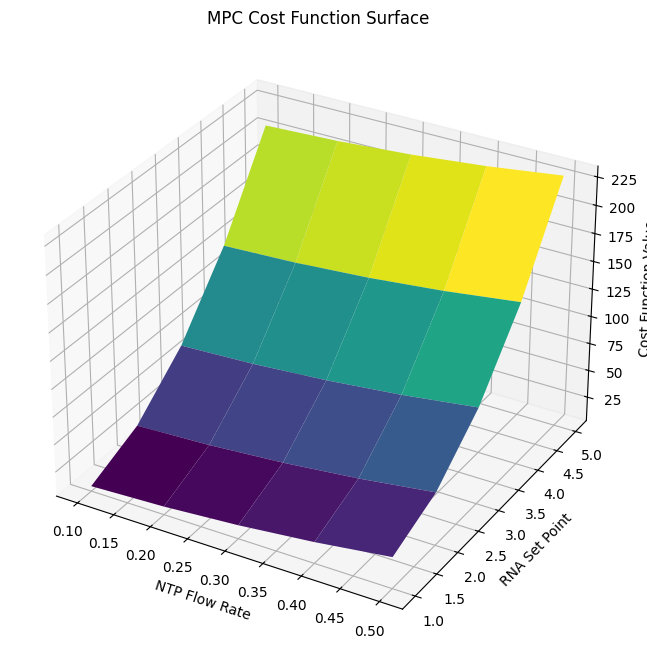

In [ ]:
# Create a meshgrid for control inputs and reference trajectories
u_init, y_ref = np.meshgrid(np.linspace(0.1, 0.5, 5), np.linspace(1, 5, 5))

# Initialise the mesh for the jacobian
j_mesh = np.zeros_like(u_init)

# Loop over the meshgrid and simulate for each (ntp, y_set point) pair
for i in range(u_init.shape[0]):
    for j in range(y_ref.shape[1]):
        ntp = u_init[i, j]
        y_set_point = y_ref[i, j]
        controller = mpc.ModelPredictiveControlIVTController(
            control_input_bounds=[(0.01, 1)],
            u_prev=[ntp],
            X_columns=[schema.IVTReactionSchema.NTP_M.value],
            measured_state=[0.0, 0.0],
            y_columns=[
                schema.IVTReactionSchema.RNA_g_L.value,
                schema.IVTReactionSchema.PPi_M.value,
            ],
            y_set_point=[y_set_point, 1e-12],
            control_horizon=10,
            w=[1, 1, 1],
        )
        j_mesh[i, j] = controller.cost_function(np.tile(ntp, 10))

# Plot the cost function surface
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(u_init, y_ref, j_mesh, cmap="viridis", edgecolor="none")
ax.set_xlabel("NTP Flow Rate")
ax.set_ylabel("RNA Set Point")
ax.set_zlabel("Cost Function Value")
ax.set_title("MPC Cost Function Surface")

In [8]:
# make the surface interactive using plotly
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=j_mesh, x=u_init, y=y_ref)])
fig.update_layout(
    title="MPC Cost Function Surface",
    scene=dict(
        xaxis_title="NTP Flow Rate",
        yaxis_title="RNA Set Point",
        zaxis_title="Cost Function Value",
    ),
)
# adjust the margin for better visibility
fig.update_layout(margin=dict(l=0, r=0, b=0, t=30))